<a href="https://colab.research.google.com/github/Arun-nexus/nexux/blob/main/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arun9x9","key":"bf041e53a52acba099f39cb5b826abc2"}'}

In [ ]:
import os
import zipfile

os.makedirs("/root/.kaggle", exist_ok=True)
!cp kaggle.json /root/.kaggle/
os.chmod("/root/.kaggle/kaggle.json", 600)


In [ ]:
!kaggle datasets download -d alessiocorrado99/animals10

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
 99% 578M/586M [00:03<00:00, 146MB/s] 
100% 586M/586M [00:03<00:00, 196MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("animals10.zip", 'r') as zip_ref:
    zip_ref.extractall("animals10_dataset")


In [ ]:
import os
os.listdir("animals10_dataset")

['raw-img', 'translate.py']

In [ ]:
train_path = "animals10_dataset"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data=ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5,1.5],
    shear_range=0.2,
    fill_mode="nearest",
    rescale=1./255,
    validation_split=0.4
)
# data=ImageDataGenerator(rescale=1./255)

training=data.flow_from_directory(
    train_path,
    target_size=(64,64),
    batch_size=256,
    class_mode="categorical",
    subset="training",
    seed=42
)
validation=data.flow_from_directory(
    train_path,
    target_size=(64,64),
    batch_size=256,
    class_mode="categorical",
    subset="validation",
    seed=42
)


Found 15711 images belonging to 10 classes.
Found 10468 images belonging to 10 classes.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,BatchNormalization,MaxPooling2D

In [ ]:
import tensorflow as tf

In [ ]:
model=Sequential()

model.add(Conv2D(128,kernel_size=(5,5),input_shape=(64,64,3),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))

In [ ]:

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 128)    │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,578 (1.39 MB)

 Trainable params: 365,130 (1.39 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
calllback=EarlyStopping(
    monitor="val_loss",
    patience=3,
    mode="auto",
    verbose=1,
    restore_best_weights=True
)

In [ ]:
hist=model.fit(training,epochs=500,validation_data=validation,callbacks=calllback)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.2790 - loss: 2.0543 - val_accuracy: 0.1844 - val_loss: 2.7170
Epoch 2/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.3261 - loss: 1.9406 - val_accuracy: 0.1868 - val_loss: 2.6686
Epoch 3/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.3592 - loss: 1.8611 - val_accuracy: 0.2092 - val_loss: 2.4120
Epoch 4/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.3864 - loss: 1.7834 - val_accuracy: 0.2196 - val_loss: 2.6620
Epoch 5/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.4105 - loss: 1.7237 - val_accuracy: 0.2298 - val_loss: 2.7471
Epoch 6/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.4187 - loss: 1.6904 - val_accuracy: 0.3129 - val_loss: 2.0318
Epoch 7/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.4433 - loss: 1.6311 - val_accuracy: 0.3817 - val_loss: 1.7653
Epoch 8/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.4640 - loss: 1.5993 - val_accuracy: 0.3753 - v

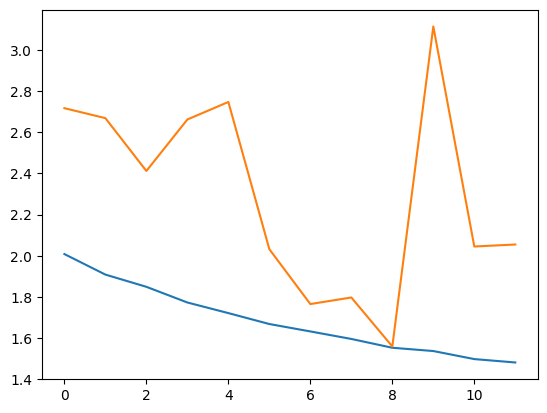

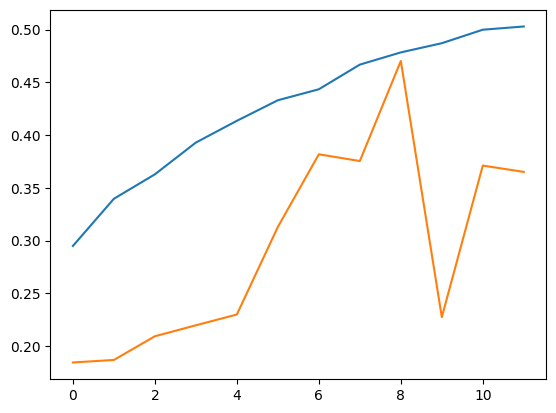

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.show()

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
uploaded=files.upload()

Saving R.jpg to R (1).jpg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
image_name=list(uploaded.keys())[0]
newimg=Image.open(image_name)
newimg=newimg.resize((64,64)).convert("RGB")
newimg=np.array(newimg)/255
newimg=np.expand_dims(newimg,axis=0)

In [ ]:
pred=model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


In [ ]:
pred=pred.argmax(axis=1)

In [ ]:
pred

array([3])